In [ ]:
# Install ultralytics if not already installed
!pip install -q ultralytics

# ✅ Imports
from ultralytics import YOLO
import os
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import seaborn as sns
from PIL import Image
import torch
import numpy as np
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/CV_Project_Part_1_model/Female or Male.v3i.yolov8.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
# ✅ Define dataset.yaml
dataset_yaml = """
path: /content/
train: /content/train/images
val: /content/valid/images
test: /content/test/images

names:
  0: female
  1: male
"""

with open("dataset.yaml", "w") as f:
    f.write(dataset_yaml)


In [ ]:
# ✅ Load and train YOLOv8 model
model = YOLO("yolov8m.pt")  # or use yolov8s.pt etc.

results = model.train(
    data="dataset.yaml",
    epochs=50,
    imgsz=224,
    batch=16,
    name="yolov8_gender_classification",
    save=True,
    project="runs/detect"
)


100%|██████████| 49.7M/49.7M [00:00<00:00, 474MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_gender_classification, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

100%|██████████| 755k/755k [00:00<00:00, 124MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776854  ultralytics.nn.modules.head.Detect           [2, [192, 384, 576]]          
Model summary: 169 layers, 25,857,478 parameters, 25,857,462 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 323MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 952.4±302.0 MB/s, size: 21.3 KB)


train: Scanning /content/train/labels... 4638 images, 123 backgrounds, 0 corrupt: 100%|██████████| 4638/4638 [00:02<00:00, 1895.56it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 259.3±86.9 MB/s, size: 8.5 KB)


val: Scanning /content/valid/labels... 436 images, 7 backgrounds, 0 corrupt: 100%|██████████| 436/436 [00:00<00:00, 1156.60it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/yolov8_gender_classification/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_gender_classification
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.25G      1.186      1.206      1.378         34        224: 100%|██████████| 290/290 [00:46<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]

                   all        436        432      0.572      0.783        0.8      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.49G      1.176      1.019      1.344         34        224: 100%|██████████| 290/290 [00:42<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.72it/s]

                   all        436        432      0.789      0.817      0.862      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.57G      1.167     0.9847      1.333         31        224: 100%|██████████| 290/290 [00:40<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.01it/s]

                   all        436        432      0.871      0.878      0.907      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.71G      1.128     0.9311      1.307         39        224: 100%|██████████| 290/290 [00:40<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]

                   all        436        432      0.709      0.892       0.93      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.86G      1.085     0.8806      1.279         31        224: 100%|██████████| 290/290 [00:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.75it/s]

                   all        436        432      0.855      0.898      0.948      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.04G      1.057     0.8396      1.265         28        224: 100%|██████████| 290/290 [00:40<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.88it/s]

                   all        436        432      0.904      0.898      0.942      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.17G      1.045     0.8078      1.259         35        224: 100%|██████████| 290/290 [00:40<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.76it/s]

                   all        436        432      0.884      0.889      0.933      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.034     0.7863       1.25         35        224: 100%|██████████| 290/290 [00:41<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.12it/s]

                   all        436        432      0.872      0.932      0.945      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.47G      1.009     0.7634      1.235         33        224: 100%|██████████| 290/290 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.04it/s]

                   all        436        432      0.886      0.902      0.946      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.66G      0.995     0.7398       1.23         37        224: 100%|██████████| 290/290 [00:40<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.95it/s]

                   all        436        432      0.885      0.894      0.945      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.76G       0.98     0.7233      1.215         35        224: 100%|██████████| 290/290 [00:40<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.79it/s]

                   all        436        432      0.829       0.86      0.931       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.92G     0.9706     0.7032      1.208         26        224: 100%|██████████| 290/290 [00:49<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.84it/s]

                   all        436        432      0.932      0.915      0.962      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.07G     0.9696     0.7031      1.209         31        224: 100%|██████████| 290/290 [00:41<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.73it/s]

                   all        436        432      0.937      0.936      0.962       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.25G     0.9532     0.6682        1.2         27        224: 100%|██████████| 290/290 [00:40<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.81it/s]

                   all        436        432      0.911        0.9      0.948      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.38G     0.9437     0.6765      1.197         28        224: 100%|██████████| 290/290 [00:41<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.79it/s]

                   all        436        432      0.895      0.945      0.965      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.57G     0.9434     0.6659      1.195         30        224: 100%|██████████| 290/290 [00:40<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.93it/s]

                   all        436        432      0.923      0.915       0.95      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.67G     0.9166     0.6596      1.186         32        224: 100%|██████████| 290/290 [00:40<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.90it/s]

                   all        436        432      0.917      0.941      0.967      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.86G     0.9088     0.6284       1.18         31        224: 100%|██████████| 290/290 [00:40<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.90it/s]

                   all        436        432      0.951      0.913       0.96      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.96G     0.9136     0.6367      1.182         27        224: 100%|██████████| 290/290 [00:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.77it/s]

                   all        436        432       0.93      0.918      0.964      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.12G     0.9127     0.6311      1.181         37        224: 100%|██████████| 290/290 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.96it/s]

                   all        436        432      0.898      0.932      0.959       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.27G     0.8898     0.6093      1.172         29        224: 100%|██████████| 290/290 [00:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.30it/s]

                   all        436        432      0.921      0.949      0.958      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.42G     0.8839     0.6122      1.168         35        224: 100%|██████████| 290/290 [00:41<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.83it/s]

                   all        436        432      0.919      0.947      0.961      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.57G      0.883     0.5815      1.159         30        224: 100%|██████████| 290/290 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.85it/s]

                   all        436        432      0.915      0.934      0.948      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.76G     0.8653     0.5839      1.156         31        224: 100%|██████████| 290/290 [00:40<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.00it/s]

                   all        436        432      0.899      0.927      0.955      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.88G     0.8514     0.5727      1.155         32        224: 100%|██████████| 290/290 [00:40<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.84it/s]

                   all        436        432       0.87      0.912      0.917      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.02G     0.8426     0.5697      1.144         29        224: 100%|██████████| 290/290 [00:40<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.06it/s]

                   all        436        432      0.927      0.933      0.949      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.19G     0.8367      0.555      1.143         28        224: 100%|██████████| 290/290 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.27it/s]

                   all        436        432       0.93      0.916      0.959      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.37G     0.8251     0.5512      1.138         35        224: 100%|██████████| 290/290 [00:40<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.09it/s]

                   all        436        432      0.944      0.924      0.967      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.48G     0.8111     0.5301      1.131         32        224: 100%|██████████| 290/290 [00:40<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.93it/s]

                   all        436        432      0.915      0.937       0.96      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.66G     0.8063      0.524      1.128         26        224: 100%|██████████| 290/290 [00:40<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.92it/s]

                   all        436        432      0.942      0.906      0.942      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.79G     0.7915     0.5152       1.12         35        224: 100%|██████████| 290/290 [00:40<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.65it/s]

                   all        436        432      0.933      0.925      0.956      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.93G      0.785     0.5078      1.119         45        224: 100%|██████████| 290/290 [00:41<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.79it/s]

                   all        436        432      0.933      0.914      0.953      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.09G     0.7756     0.5054       1.11         37        224: 100%|██████████| 290/290 [00:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]

                   all        436        432      0.926      0.922      0.945      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.28G     0.7648     0.4944      1.111         29        224: 100%|██████████| 290/290 [00:44<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.73it/s]

                   all        436        432      0.943      0.931      0.952      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.38G     0.7574     0.4844      1.103         35        224: 100%|██████████| 290/290 [00:40<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.86it/s]

                   all        436        432       0.94      0.909      0.955       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.57G     0.7377      0.479      1.095         38        224: 100%|██████████| 290/290 [00:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.76it/s]

                   all        436        432      0.936      0.934      0.962      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.68G     0.7284     0.4711      1.092         31        224: 100%|██████████| 290/290 [00:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.22it/s]

                   all        436        432      0.927      0.933      0.961      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.86G     0.7174     0.4611      1.086         35        224: 100%|██████████| 290/290 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.38it/s]

                   all        436        432      0.908      0.938      0.955      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.99G     0.7106     0.4456      1.078         35        224: 100%|██████████| 290/290 [00:40<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.88it/s]

                   all        436        432      0.912      0.937      0.953      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.17G     0.7065     0.4452       1.08         28        224: 100%|██████████| 290/290 [00:42<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.94it/s]

                   all        436        432      0.908      0.947      0.957      0.712


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.28G      0.567     0.2742      1.045         14        224: 100%|██████████| 290/290 [00:41<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.82it/s]

                   all        436        432      0.933      0.923      0.953      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.44G     0.5486     0.2671      1.032         13        224: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.43it/s]

                   all        436        432      0.924      0.939      0.955      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.36G     0.5308     0.2537      1.014         13        224: 100%|██████████| 290/290 [00:41<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.87it/s]

                   all        436        432      0.919      0.928      0.956       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.36G     0.5124      0.244      1.008         14        224: 100%|██████████| 290/290 [00:49<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.03it/s]

                   all        436        432      0.933      0.925      0.949      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.36G     0.4974     0.2382     0.9943         13        224: 100%|██████████| 290/290 [00:40<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.70it/s]

                   all        436        432      0.945      0.923      0.947      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.36G     0.4762     0.2277     0.9877         14        224: 100%|██████████| 290/290 [00:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.77it/s]

                   all        436        432      0.926      0.924      0.953       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.36G     0.4667     0.2225     0.9792         14        224: 100%|██████████| 290/290 [00:40<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.87it/s]

                   all        436        432      0.941      0.914       0.95      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.43G     0.4461     0.2127     0.9652         12        224: 100%|██████████| 290/290 [00:40<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.75it/s]

                   all        436        432      0.946      0.916      0.952      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.49G      0.438     0.2054     0.9602         13        224: 100%|██████████| 290/290 [00:40<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]

                   all        436        432       0.93      0.932      0.949      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.56G     0.4319     0.2038     0.9595         14        224: 100%|██████████| 290/290 [00:40<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]

                   all        436        432      0.925      0.933       0.95      0.709



50 epochs completed in 0.619 hours.
Optimizer stripped from runs/detect/yolov8_gender_classification/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8_gender_classification/weights/best.pt, 52.0MB

Validating runs/detect/yolov8_gender_classification/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.86it/s]


                   all        436        432      0.944      0.924      0.967      0.725
                female        234        236      0.963      0.941      0.979      0.753
                  male        195        196      0.925      0.908      0.955      0.697
Speed: 0.0ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/yolov8_gender_classification


In [ ]:
# ✅ Save best.pt model to working directory
best_path = "runs/detect/yolov8_gender_classification/weights/best.pt"
if os.path.exists(best_path):
    shutil.copy(best_path, "/content/best.pt")
    print("✅ best.pt copied to content directory")
else:
    print("❌ best.pt not found, training might have failed")


✅ best.pt copied to content directory


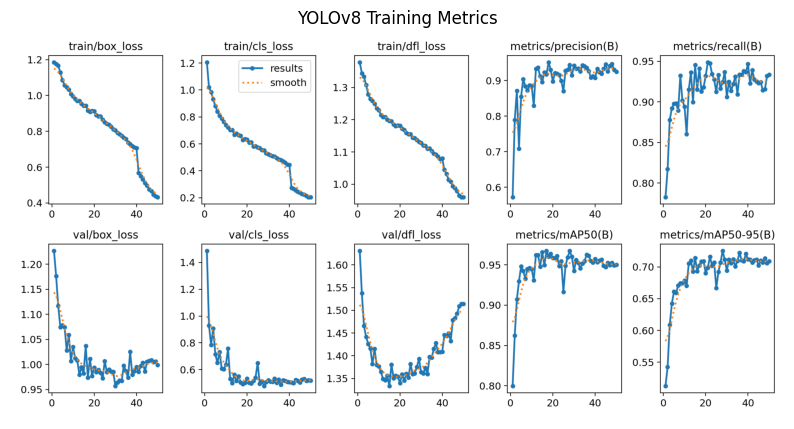

In [ ]:
# ✅ Show training results.png from YOLO
def plot_metrics(results):
    metrics_path = os.path.join(results.save_dir, "results.png")
    if os.path.exists(metrics_path):
        img = Image.open(metrics_path)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title("YOLOv8 Training Metrics")
        plt.show()
    else:
        print("❌ Training metrics image not found.")

plot_metrics(results)


In [ ]:
# ✅ Evaluate on test set
metrics = model.val(data="dataset.yaml", split="test")


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 352.2±131.5 MB/s, size: 9.5 KB)


val: Scanning /content/test/labels... 245 images, 5 backgrounds, 0 corrupt: 100%|██████████| 245/245 [00:00<00:00, 2448.08it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.19it/s]


                   all        245        243      0.945      0.939       0.97      0.719
                female        129        130       0.96      0.922      0.973       0.74
                  male        113        113      0.931      0.955      0.968      0.698
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/yolov8_gender_classification2



image 1/1 /content/test/images/1-45-_jpeg.rf.d26e3d2da003126d2b681f04c1cf9361.jpg: 224x224 1 female, 747.4ms
Speed: 1.1ms preprocess, 747.4ms inference, 5.2ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/1-2453-_jpg.rf.c54da586efef2396b79ce1602465ab6e.jpg: 224x224 1 male, 497.8ms
Speed: 1.1ms preprocess, 497.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/1-2907-_jpg.rf.70c4db053c427ba1b01032dfd4f81466.jpg: 224x224 1 female, 431.9ms
Speed: 1.5ms preprocess, 431.9ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/1-3270-_jpg.rf.9c6933861b754c9a68fed4fe16894c8e.jpg: 224x224 1 female, 226.7ms
Speed: 1.0ms preprocess, 226.7ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/1-513-_jpg.rf.254511996fac152fbb284bfa0bdec367.jpg: 224x224 1 male, 229.8ms
Speed: 0.9ms preprocess, 229.8ms inference, 1.0ms postproce

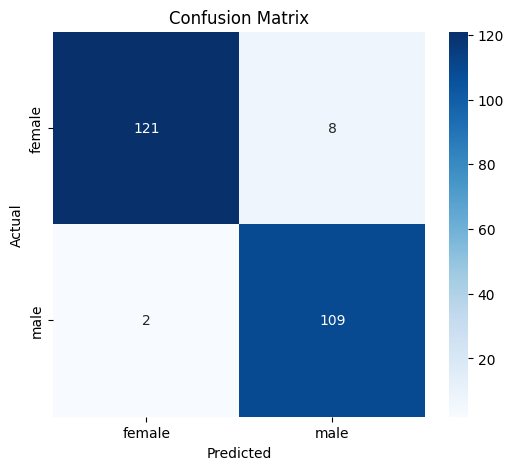

In [ ]:
import os
import glob
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- Setup ---
MODEL_PATH = "/content/best.pt"
TEST_IMG_DIR = "/content/test/images"
TEST_LABEL_DIR = "/content/test/labels"
CLASS_NAMES = ["female", "male"]

# Load model
model = YOLO(MODEL_PATH)

# Init
y_true = []
y_pred = []

# Process images
image_paths = glob.glob(os.path.join(TEST_IMG_DIR, "*.jpg"))
for img_path in image_paths:
    # Get matching label
    label_path = os.path.join(TEST_LABEL_DIR, os.path.basename(img_path).replace(".jpg", ".txt"))
    if not os.path.exists(label_path):
        continue

    # Ground truth labels
    with open(label_path, "r") as f:
        labels = [int(line.split()[0]) for line in f.readlines()]

    # YOLOv8 prediction
    results = model(img_path)[0]
    preds = [int(cls.item()) for cls in results.boxes.cls]

    # Match labels and predictions by count (simple assumption)
    for gt, pr in zip(labels, preds):
        y_true.append(gt)
        y_pred.append(pr)

# --- Metrics ---
print("✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



image 1/1 /content/valid/images/1-3339-_jpg.rf.62940a9180fb89d68cf18516330a49ee.jpg: 224x224 1 female, 45.9ms
Speed: 1.0ms preprocess, 45.9ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/valid/images/1-5355-_jpg.rf.56f334fd06a5ce5c34ec78b4d86f50e8.jpg: 224x224 1 female, 39.0ms
Speed: 1.0ms preprocess, 39.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/valid/images/1-5460-_jpg.rf.01858c46e9e261e4086ad5f5c05c3d5c.jpg: 224x224 1 female, 45.1ms
Speed: 0.8ms preprocess, 45.1ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/valid/images/1-2950-_jpg.rf.e8ba164a9b3211798c8ab5bbf6da5188.jpg: 224x224 1 female, 40.2ms
Speed: 1.1ms preprocess, 40.2ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/valid/images/1-177-_jpg.rf.9ebb083eac7d8775d50ba7db2ba5aca1.jpg: 224x224 1 male, 59.2ms
Speed: 0.9ms preprocess, 59.2ms inference, 0.9ms postprocess

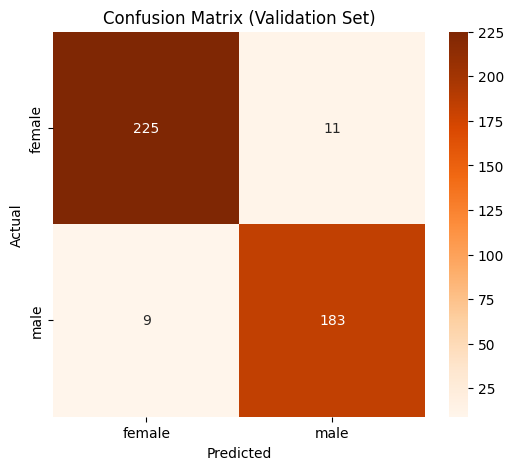

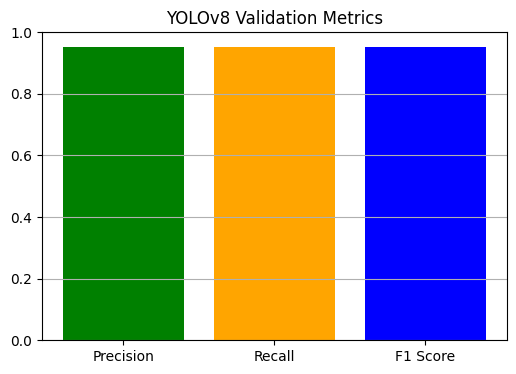

In [ ]:
import os
import glob
import numpy as np
import cv2
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
MODEL_PATH = "/content/best.pt"  # adjust if needed
VAL_IMG_DIR = "/content/valid/images"
VAL_LABEL_DIR = "/content/valid/labels"
CLASS_NAMES = ["female", "male"]

# Load model
model = YOLO(MODEL_PATH)

# Store true and predicted labels
y_true, y_pred = [], []

# Loop through validation images
image_paths = glob.glob(os.path.join(VAL_IMG_DIR, "*.jpg"))
for img_path in image_paths:
    label_path = os.path.join(VAL_LABEL_DIR, os.path.basename(img_path).replace(".jpg", ".txt"))
    if not os.path.exists(label_path):
        continue

    # Ground truth
    with open(label_path, "r") as f:
        labels = [int(line.split()[0]) for line in f.readlines()]

    # Predictions
    results = model(img_path)[0]
    preds = [int(cls.item()) for cls in results.boxes.cls]

    # Match by count (simple assumption)
    for gt, pr in zip(labels, preds):
        y_true.append(gt)
        y_pred.append(pr)

# --- Metrics ---
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
acc = accuracy_score(y_true, y_pred)

print(f"✅ validation Accuracy: {acc:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🌀 Recall: {recall:.4f}")
print(f"📊 F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# --- Optional: Bar Chart of Metrics ---
plt.figure(figsize=(6, 4))
plt.bar(["Precision", "Recall", "F1 Score"], [precision, recall, f1], color=["green", "orange", "blue"])
plt.ylim(0, 1)
plt.title("YOLOv8 Validation Metrics")
plt.grid(axis='y')
plt.show()



image 1/1 /content/test/images/071860_jpg.rf.af9d42212baca11d44dee62ab0a9d61c.jpg: 224x224 1 female, 65.7ms
Speed: 1.0ms preprocess, 65.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/071901_jpg.rf.715c88e782f7ae3ce510e43573c39976.jpg: 224x224 1 female, 69.8ms
Speed: 1.2ms preprocess, 69.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/071905_jpg.rf.fdfd793e302b441146b1840691ece3fb.jpg: 224x224 1 female, 121.4ms
Speed: 11.8ms preprocess, 121.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/072028_jpg.rf.92054eac41d8b474a58e18c0f7e0d8e0.jpg: 224x224 1 female, 52.9ms
Speed: 7.0ms preprocess, 52.9ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/test/images/072055_jpg.rf.766d62438acbf0d9524e76c4df137a46.jpg: 224x224 1 female, 42.9ms
Speed: 1.0ms preprocess, 42.9ms inference, 1.0ms postprocess per

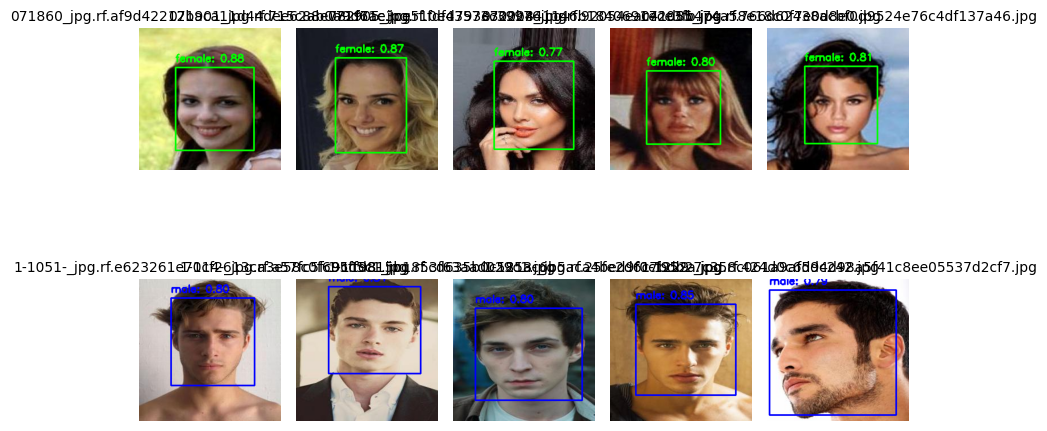

In [ ]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Paths (update if needed)
MODEL_PATH = "/content/best.pt"
TEST_IMG_DIR = "/content/test/images"
CLASS_NAMES = ["female", "male"]
CONF_THRESHOLD = 0.3
NUM_IMAGES = 10  # number of images to display (in grid)

# Load YOLO model
model = YOLO(MODEL_PATH)

# Get image paths
image_paths = sorted(glob.glob(os.path.join(TEST_IMG_DIR, "*.jpg")))[:NUM_IMAGES]

# Prepare grid size (e.g., 2x3 for 6 images)
cols = 5
rows = (NUM_IMAGES + cols - 1) // cols

# Setup plot
plt.figure(figsize=(8, 3* rows))

for idx, img_path in enumerate(image_paths):
    # Load and preprocess image
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Predict
    results = model(img_path, conf=CONF_THRESHOLD)[0]

    # Draw boxes
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        cls_id = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        label = f"{CLASS_NAMES[cls_id]}: {conf:.2f}"
        color = (0, 0, 255) if cls_id == 1 else (0, 255, 0)

        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Show in grid
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path), fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

